# Car Price Prediction

## import dependencies

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Read the data into dataframe

In [40]:
car_data = pd.read_csv("./DataSets/car_price_dataset.csv")
car_data

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [41]:
car_data.shape

(10000, 10)

## Exploratory data analysis

In [42]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [43]:
car_data.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


<Axes: ylabel='Mileage'>

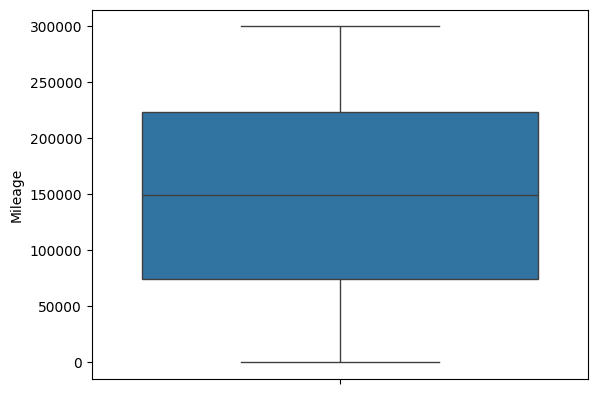

In [44]:
sns.boxplot(car_data['Mileage'])

## Encodings

In [45]:
car_data.Brand.unique()

array(['Kia', 'Chevrolet', 'Mercedes', 'Audi', 'Volkswagen', 'Toyota',
       'Honda', 'BMW', 'Hyundai', 'Ford'], dtype=object)

In [46]:
car_data = pd.get_dummies(car_data,columns=['Brand','Model','Fuel_Type','Transmission'],dtype='int')
car_data

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,...,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,8501,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2012,2.0,5356,2,3,12092,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,2020,4.2,231440,4,2,11171,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,2023,2.0,160971,2,1,11780,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2003,2.6,286618,3,3,2867,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9996,2002,1.4,168000,2,1,6240,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
9997,2010,3.0,86664,5,1,9866,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
9998,2002,1.4,225772,4,1,4084,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


## Train test split

In [47]:
X = car_data.drop(columns=['Price'],axis=1)
y = car_data.Price

In [48]:
X.shape,y.shape

((10000, 52), (10000,))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 52), (2000, 52), (8000,), (2000,))

## Scaling

In [90]:
scaler = StandardScaler()

features_to_scale = ['Year','Engine_Size','Mileage','Doors','Owner_Count']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
print(X_train_scaled.shape)
X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
print(X_train_scaled.shape)

X_test_scaled[features_to_scale] = column_transformer.transform(X_test)

X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

(8000, 52)
(8000, 52)


In [91]:
X_train_scaled.shape

(8000, 52)

## Fit and predict

In [92]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [93]:
model.score(X_train_scaled,y_train)

0.9991448773803548

In [94]:
model.score(X_test_scaled,y_test)

0.9996225300202679